In [ ]:
!pip install -U SoMaJo

In [ ]:
!pip install -U seaborn

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.options.mode.chained_assignment = None

In [8]:
df = pd.read_csv('../dataset/cefr_leveled_texts.csv')

In [9]:
# remove the advertisement, business card, dictionary entry and menus from A1 level, which can't be correctly tokenized
df = df.drop(index=[1041, 1064, 1068, 1113, 1117, 1223]).reset_index(drop=True)

In [10]:
df.head()

,text,label
0,Hi!\nI've been meaning to write for ages and f...,B2
1,﻿It was not so much how hard people found the ...,B2
2,Keith recently came back from a trip to Chicag...,B2
3,"The Griffith Observatory is a planetarium, and...",B2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2


In [11]:
df["label"].value_counts()

label
B2    286
A1    282
A2    272
C1    241
B1    205
C2    202
Name: count, dtype: int64

In [12]:
from somajo import SoMaJo

tokenizer = SoMaJo("en_PTB", split_camel_case=True)

In [13]:
def somajo_tokenize(paragraphs):
    # paragraphs must be an iterable object
    sentences = tokenizer.tokenize_text(paragraphs)

    sentence_count = 0
    token_each_sentence = []

    for sentence in sentences:
        sentence_count += 1

        token_count = sum(1 for _ in sentence)
        token_each_sentence.append(token_count)

    token_count = sum(token_each_sentence)
    avg_length_each_sentence = sum(token_each_sentence) / len(token_each_sentence)

    return sentence_count, token_count, avg_length_each_sentence

In [14]:
### Tokenizing all texts may take up to 1 min

df["stat"] = df["text"].apply(lambda x: somajo_tokenize([x]))
df["sentence_count"] = df["stat"].apply(lambda x: x[0])
df["token_count"] = df["stat"].apply(lambda x: x[1])
df["avg_len_each_sent"] = df["stat"].apply(lambda x: x[2]).round(2)
df = df.drop('stat', axis=1)
df.head()

,text,label,sentence_count,token_count,avg_len_each_sent
0,Hi!\nI've been meaning to write for ages and f...,B2,26,529,20.35
1,﻿It was not so much how hard people found the ...,B2,34,761,22.38
2,Keith recently came back from a trip to Chicag...,B2,14,266,19.00
3,"The Griffith Observatory is a planetarium, and...",B2,16,343,21.44
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2,18,411,22.83


In [15]:
## include the emails
to_check = df[ (df["label"]=="A1") & (df["avg_len_each_sent"] > 12) ]
for index, value in to_check['text'].items():
    print("=" * 60)
    print(f"Row {index}")
    print(value)

Row 1079
From: Arina Marat, HR Assistant
To: Jane Claret
Subject: Your appointment on 14 March
Dear Ms Claret,
Thank you for your email.
I am writing to confirm your appointment with our HR manager, Mrs Sofia Aronov.
Your appointment will take place at 3 p.m. on Thursday 14 March at our Astana offices in Emerald Towers. 
When you arrive, please go to the reception on the 26th floor and ask for me. I will take you to Mrs Aronov's office. 
We look forward to meeting you soon.
Best regards,
Arina Marat
HR Assistant
Row 1158
o: info@ascot-hotel.co.uk
From: David Mathews
Subject: Booking 2 nights next week
Dear Ascot Hotel,
I would like to reserve an accessible single room for two nights with breakfast on the 22 and 23 of April. Could I have a quiet room with a view if possible, please?
I will arrive at about 10 p.m. and I have an early meeting the next morning, so please could you leave an iron and ironing board in the room?
I have a promotional code (MH2219). Please can you confirm that i

In [16]:
sentence_count = df.groupby('label')['sentence_count'].agg(['mean', 'std']).reset_index().round(2)
sentence_count.attrs['title'] = "Average number of sentences each text"
sentence_count

,label,mean,std
0,A1,15.94,4.17
1,A2,21.90,7.73
2,B1,26.06,17.80
3,B2,26.71,13.88
4,C1,31.34,13.86
5,C2,26.82,11.76


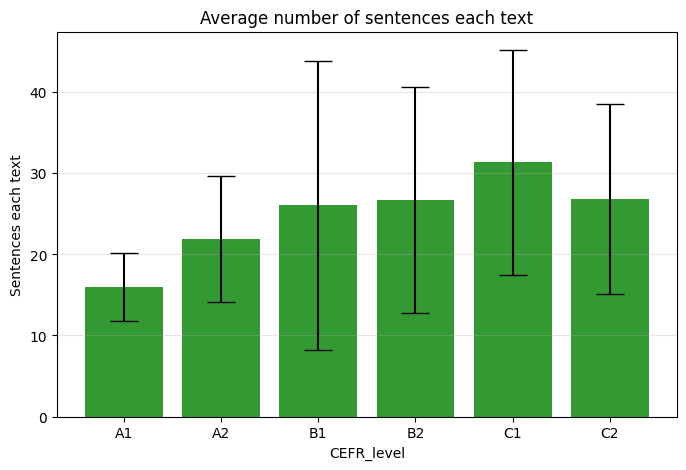

In [24]:
plt.figure(figsize=(8, 5))
plt.bar(sentence_count['label'], sentence_count['mean'], yerr=sentence_count['std'],
        capsize=10, alpha=0.8, color='green')
plt.xlabel('CEFR_level')
plt.ylabel('Sentences each text')
plt.title('Average number of sentences each text')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [18]:
token_count = df.groupby('label')['token_count'].agg(['mean', 'std']).reset_index().round(2)
token_count.attrs['title'] = "Average number of tokens each text"
token_count

,label,mean,std
0,A1,119.80,39.71
1,A2,270.50,138.51
2,B1,472.38,338.45
3,B2,574.36,331.77
4,C1,786.19,347.91
5,C2,804.36,349.39


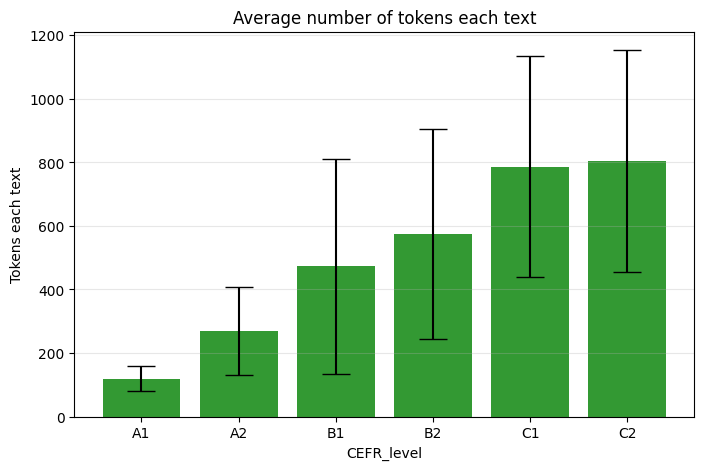

In [25]:
plt.figure(figsize=(8, 5))
plt.bar(token_count['label'], token_count['mean'], yerr=token_count['std'],
        capsize=10, alpha=0.8, color='green')
plt.xlabel('CEFR_level')
plt.ylabel('Tokens each text')
plt.title('Average number of tokens each text')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [20]:
avg_len_each_sent = df.groupby('label')['avg_len_each_sent'].agg(['mean', 'std']).reset_index().round(2)
avg_len_each_sent.attrs['title'] = "Average number of tokens each sentence"
avg_len_each_sent

,label,mean,std
0,A1,7.52,1.84
1,A2,12.05,3.81
2,B1,18.25,4.18
3,B2,21.29,3.92
4,C1,25.33,4.19
5,C2,30.70,6.02


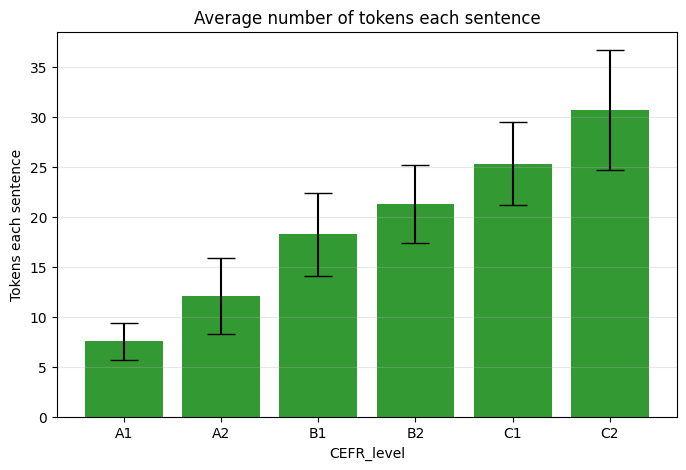

In [26]:
plt.figure(figsize=(8, 5))
plt.bar(avg_len_each_sent['label'], avg_len_each_sent['mean'], yerr=avg_len_each_sent['std'],
        capsize=10, alpha=0.8, color='green')
plt.xlabel('CEFR_level')
plt.ylabel('Tokens each sentence')
plt.title('Average number of tokens each sentence')
plt.grid(axis='y', alpha=0.3)
plt.show()